<blockquote><h4><ul><li>Аналитик в компании “Рога и Ко” за день написал некоторое количество
SQL-запросов. Все запросы можно охарактеризовать количественной
характеристикой сложности выполнения - условная “память”.<br><br>
<ul>
<li>Три “тяжелейших” (7/20 общей затраченной памяти) запроса превысили
максимальное время выполнения и были отключены системой.</li>
<li>Три “легчайших” (5/13 затраченной памяти всех оставшихся запросов)
выполнялись менее 10 минут каждый.</li><li>Остальные запросы выполнялись
менее получаса каждый.</li>
</ul></li><br>
Найдите общее количество запросов, которое написал аналитик<br>
Дайте оценку на среднее время успешно выполненного запроса</ul>
</h4></blockquote>

Допустим, что все запросы соответсвующих типов ("тяжелейшие", "средние", "легчайшие") тратят одинаковое количество памяти.
Тогда:
<ul>
<li>Один "тяжелейший" запрос тратит $\frac{7}{3}=2.333..$</li>
<li>Один "легчайший запрос тратит $\frac{5}{3}=1.666..$</li>
<li>Каждый "средний" запрос тратит $\frac{8}{n}$ памяти, где $n$ - количество "средних" запросов.</li>
</ul>

Так как $1.666 < \frac{8}{n} < 2.333$ и $n \in {N}$, то $n = 4$.

**Общее количество запросов = 10.**

Для оценки среднего времени выполнения запроса воспользуемся методом Монте-Карло, допуская, что время запроса распределено равномерно.

In [1]:
import numpy as np
import pylab as plb

In [2]:
N=10000

In [3]:
easy_reqs = np.random.uniform(0, 10, (N, 3))
easy_reqs[:5]

array([[6.71483258, 4.82239988, 5.23828369],
       [7.70976928, 2.9928104 , 5.31899896],
       [4.13556457, 3.2531705 , 9.71991729],
       [6.68748077, 8.74867445, 3.79926059],
       [3.78917967, 3.41348057, 5.57499283]])

In [4]:
mid_reqs = np.random.uniform(10, 30, (N, 4))
mid_reqs[:5]

array([[25.67961131, 11.43167275, 20.17891787, 29.95302945],
       [24.09236179, 25.47579195, 10.85453665, 15.95161782],
       [14.4083253 , 20.34194734, 19.31566007, 21.38350917],
       [29.13638159, 11.13101245, 10.96033803, 17.93993251],
       [29.25214466, 14.90436849, 19.65991875, 23.6123773 ]])

In [5]:
reqs = np.hstack((easy_reqs, mid_reqs))
reqs[:5]

array([[ 6.71483258,  4.82239988,  5.23828369, 25.67961131, 11.43167275,
        20.17891787, 29.95302945],
       [ 7.70976928,  2.9928104 ,  5.31899896, 24.09236179, 25.47579195,
        10.85453665, 15.95161782],
       [ 4.13556457,  3.2531705 ,  9.71991729, 14.4083253 , 20.34194734,
        19.31566007, 21.38350917],
       [ 6.68748077,  8.74867445,  3.79926059, 29.13638159, 11.13101245,
        10.96033803, 17.93993251],
       [ 3.78917967,  3.41348057,  5.57499283, 29.25214466, 14.90436849,
        19.65991875, 23.6123773 ]])

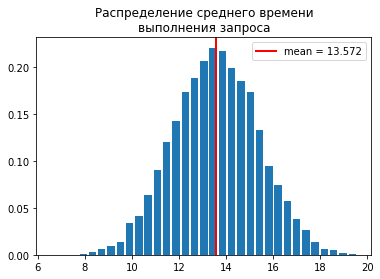

In [6]:
means = reqs.mean(axis=1)
mean = means.mean()
_ = plb.hist(means, bins = int(np.sqrt(N)/3), rwidth=0.8, density = True)
plb.axvline(x = mean, color='r', lw = 2, label = 'mean = {}'.format(np.round(mean, 3)))
plb.title('Распределение среднего времени\nвыполнения запроса')
plb.legend()
plb.show()

**Среднее время успешно выполненного запроса равняется $13.572$ минут**

<blockquote><h4><ul><li>В команде есть два стажера-аналитика. Правильный ответ каждый из
стажеров получает в 14 из 17 случаев. Чтобы быть более уверенным в
важном решении, менеджер решил дать одну и ту же задачу сразу обоим
аналитикам: если оба получают одинаковый ответ, то менеджер его
использует, а если ответы разные - выберет один из них наугад. Насколько
такой способ повышает шансы менеджера принять верное решение?</li></ul></h4></blockquote>

$p = \frac{14}{17}$ - вероятность получения правильного ответа.

Так как ответы аналитиков независимы друг от друга, то таблица совместности выглядит следующим образом:

|   | Первый аналитик<br>получил правильный<br>ответ | Первый аналитик<br>ошибся |
|---|------------------------------------------|------------------------|
|**Второй аналитик<br>получил правильный<br>ответ**|$$\frac{196}{289} = 0.678$$|$$\frac{42}{289} = 0.145$$|
|**Второй аналитик<br>ошибся**|$$\frac{42}{289} = 0.145$$|$$\frac{9}{289} = 0.031$$|

Вероятность того, что менеджер выберет правильный ответ, при условии, что один из аналитиков ошибся, равняется $\frac{1}{2}$.<br>
Следовательно, вероятность получить правильный ответ равняется $0.678 + \frac{1}{2}{0.145} + \frac{1}{2}{0.145} = 0.824 = \frac{14}{17}$ 

**Ответ: такой подход никак не влияет на принятие верного решения**

<blockquote><h4><ul><li>В мешке лежат три кубика: 6-гранный, 12-гранный, 20-гранный. Мы достали
один кубик наудачу, подкинули его и на нем выпало 4. Какова вероятность,
что если мы так же достанем и подкинем один из оставшихся в мешке
кубиков, на нем выпадет меньше?
</li></ul></h4></blockquote>

Количество комбинаций кубиков в таком случае будет равно 6:
<ul>
    <li>вытащили 6-гранный кубик, вытащили 12-гранный</li>
    <li>вытащили 6-гранный кубик, вытащили 20-гранный</li>
    <li>вытащили 12-гранный кубик, вытащили 6-гранный</li>
    <li>вытащили 12-гранный кубик, вытащили 20-гранный</li>
    <li>вытащили 20-гранный кубик, вытащили 6-гранный</li>
    <li>вытащили 20-гранный кубик, вытащили 12-гранный</li>
</ul>

Вероятность каждого из этих исходов $p = \frac{1}{6}$.

Вероятности выпасть у кубиков значения меньше 4 равны $\frac{3}{6}$, $\frac{3}{12}$ и $\frac{3}{20}$ соответсвенно.

**Искомая вероятность равна: $$\frac{1}{6} \frac{3}{12} + \frac{1}{6} \frac{3}{20} + \frac{1}{6} \frac{3}{6} + \frac{1}{6} \frac{3}{20} + \frac{1}{6} \frac{3}{6} + \frac{1}{6} \frac{3}{12} = \frac{3}{10}$$**

<blockquote><h4><ul><li>Чтобы между пользователями Авито было больше доверия, а жизнь
мошенников стала сложнее, мы решили попробовать ввести систему
отзывов: покупатель может оставить отзыв на продавца. Отзыв может быть

просто рейтингом (1-5 звездочек), а может содержать дополнительно какой-
то произвольный текст.<br>
    
4.1 Предложите метрики, по которым можно будет следить за прогрессом такого
проекта и определять его успешность.<br><br>
4.2 Поскольку Авито не магазин, а площадка для связи покупателя и продавца, мы
в большинстве случаев не знаем, произошла ли в действительности сделка и на
каких условиях. Для большинства сделок последнее, что нам известно -
покупатель нажал кнопку просмотра телефона продавца или связался с ним в
чате. Также мы всегда знаем логин (привязанный к email и телефону) продавца,
но покупатель может быть незалогиненным. В связи с этим кажется, что есть
большой риск накрутки отзывов и недобросовестного использования системы:
например, профессиональные участники будут пытаться оставлять негативные
отзывы на своих конкурентов и хвалебные на себя. Предположим, что система
некоторое время уже работает и у нас есть данные по отзывам и всей активности
клиентов: что продавал, что искал, на каких объявлениях смотрел телефоны и
т.п.<br><br>
Как оценить масштабы накрутки, т.е. долю фальшивых отзывов?
    </li></ul></h4></blockquote>

4.1 Главными метриками являются:
<ul><li>Изменение активности пользователей. Если количество пользователей увеличилось и покупатели стали чаще звонить/писать продавцам, то проект можно считать успешным</li>
    <li>Доля фальшивых отзывов</li>
</ul>

4.2 Отзывы покупателей можно считать фальшивыми, если:
<ul>
<li>покупатель не смотрел номер телефона продавца и не писал ему</li>
<li>у покупателя скудная история поиска и он просмотрел мало предложений</li>
<li>покупатель оставил много отзывов за короткий промежуток времени</li>
<li>за короткий промежуток времени у продавца появилось много отзывов, выбивающихся из статистики</li>
</ul>